In [2]:
import openpyxl

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


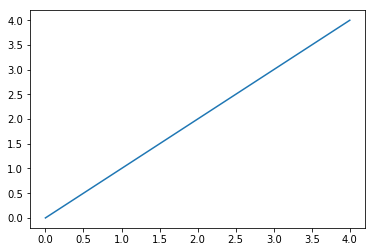

In [8]:
import pandas as pd
plot(arange(5))

In [9]:
df = pd.read_csv("train.csv")


In [10]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [12]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [13]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [14]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

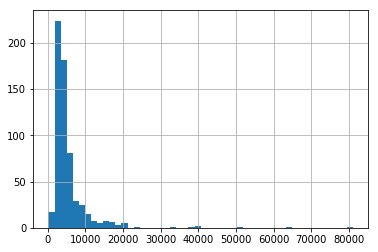

In [18]:
df['ApplicantIncome'].hist(bins=50)

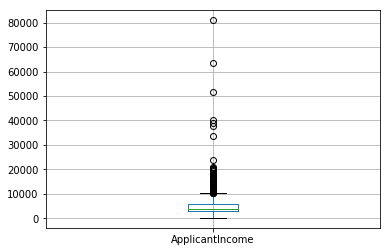

In [19]:
df.boxplot(column='ApplicantIncome')

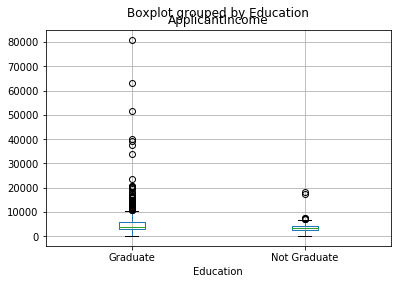

In [20]:
df.boxplot(column='ApplicantIncome', by = 'Education')

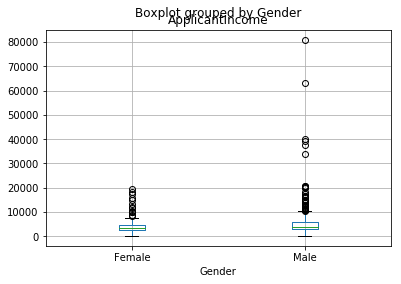

In [22]:
df.boxplot(column='ApplicantIncome', by = 'Gender')

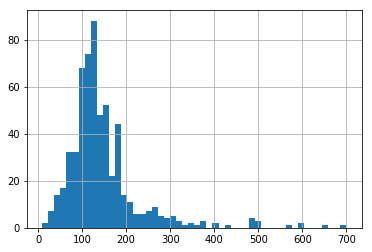

In [24]:
df['LoanAmount'].hist(bins=50)

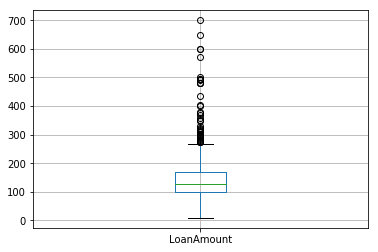

In [25]:
df.boxplot(column='LoanAmount')

In [28]:
df.loc[(df["Gender"]=="Female") & (df["Education"]=="Not Graduate") & (df["Loan_Status"]=="Y"), ["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


In [30]:
#Create a new function

def num_missing(x):
    return sum(x.isnull())

In [38]:
#Per column
print ("Missing values per column:")
print (df.apply(num_missing, axis=0))

Missing values per column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [39]:
#Per Row
print ("Missing values per row:")
print (df.apply(num_missing, axis = 1))

Missing values per row:
0      1
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     1
17     0
18     0
19     2
20     0
21     0
22     0
23     1
24     2
25     0
26     0
27     0
28     0
29     1
      ..
584    0
585    0
586    0
587    0
588    1
589    0
590    0
591    0
592    1
593    0
594    0
595    0
596    0
597    1
598    0
599    0
600    2
601    1
602    0
603    0
604    0
605    1
606    0
607    0
608    0
609    0
610    0
611    0
612    0
613    0
Length: 614, dtype: int64


In [43]:
temp1 = df['Credit_History'].value_counts(ascending=True) 
temp2 = df.pivot_table(values='Loan_Status',
        index=['Credit_History'],
        aggfunc=lambda x: x.map({'Y':1,'N':0}).mean()) 
print ('Frequency Table for Credit History:') 
print (temp1) 
print ('\nProbility of getting loan for each Credit History class:') 
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


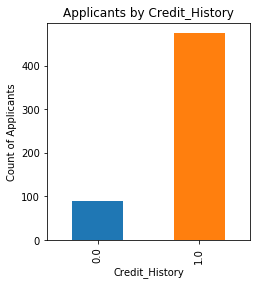

In [46]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(8,4)) 
ax1 = fig.add_subplot(121) 
ax1.set_xlabel('Credit_History') 
ax1.set_ylabel('Count of Applicants') 
ax1.set_title("Applicants by Credit_History") 
temp1.plot(kind='bar') 


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.5,1,'Probability of getting loan by credit history')

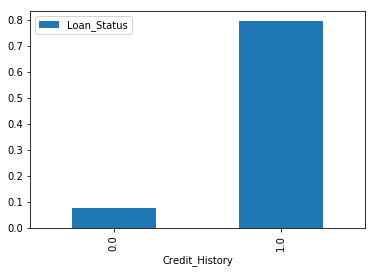

In [52]:
ax2 = fig.add_subplot(122) 
temp2.plot(kind = 'bar') 
ax2.set_xlabel('Credit_History') 
ax2.set_ylabel('Probability of getting loan') 
ax2.set_title("Probability of getting loan by credit history")

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


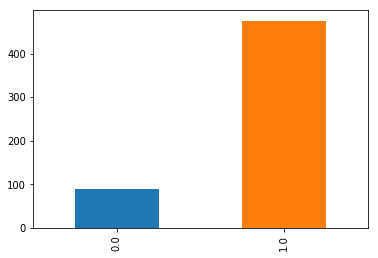

In [57]:
ax3 = fig.add_subplot(122) 
ax3.set_xlabel('Credit_History') 
ax3.set_ylabel('Married') 
ax3.set_title("Applicants by Credit_History") 
temp1.plot(kind='bar') 

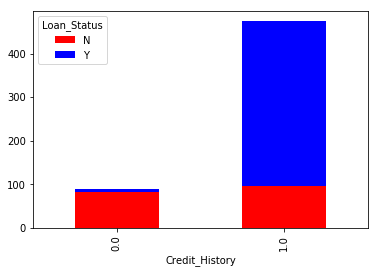

In [58]:
temp4 = pd.crosstab(df['Credit_History'],df['Loan_Status'])
temp4.plot(kind='bar',stacked=True, color=['red','blue'],grid=False)

In [65]:
temp6 = df.pivot_table(values='Loan_Status',index=['Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())